# Jonathan Halverson
# Thursday, April 21, 2016
# K-Means applied to an image

Our goal here is to read in an image, determine the three most popular colors as determined by K-Means, then display the image using only these three colors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

Read in the image and store the shape:

In [2]:
import matplotlib.image as mpimg
img = mpimg.imread('apple_tree.png')
nrows, ncols, depth = img.shape

Get familiar with the structure:

In [3]:
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel
print red, green, blue

0.580392 0.596078 0.282353


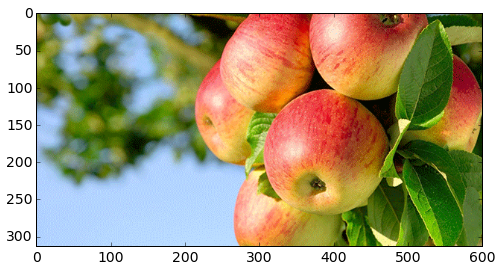

In [4]:
plt.imshow(img)

### Form three clusters out of all the RGB values:

In [5]:
from sklearn.cluster import KMeans

X = img.reshape((nrows * ncols, depth))
km = KMeans(n_clusters=3, init='k-means++', n_init=25)
km = km.fit(X)

In [6]:
rgb = km.cluster_centers_
print rgb

[[ 0.81472964  0.54578984  0.31084721]
 [ 0.29211402  0.35306173  0.0868315 ]
 [ 0.69367443  0.78833365  0.8980378 ]]


In [7]:
y = km.predict(X).reshape((nrows, ncols))

Assign each pixel on the three colors that it is closest to:

In [8]:
for i in xrange(nrows):
    for j in xrange(ncols):
        img[i, j] = rgb[y[i, j]]

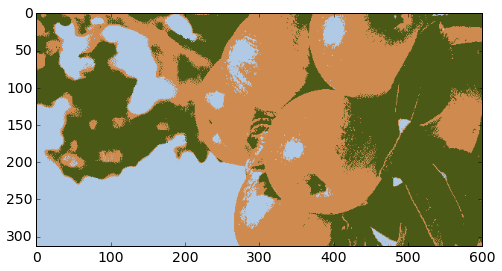

In [9]:
plt.imshow(img)